# KNN variando train percentage

En este experimento corremos solo KNN sobre un porcentaje del dataset total

In [ ]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

In [ ]:
!pwd

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import metnum as mt
import datetime
import os
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from numpy import savetxt
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [2]:
#directory containing dataset
DATA_DIR = '../data/'
TRAIN_SET = DATA_DIR + 'train.csv'

#percentage over total of train cases
PERCENTAGE_OF_TRAIN_CASES = 1
#neighbors for finding the mode in KNN
N_NEIGHBORS = 3
#components for PCA
N_COMPONENTS =40
#number of iterations to find eigenvalues and eigenvectors in power iteration
N_ITERATIONS =5000
#epsilon for power iteration
EPSILON = 1e-10

In [3]:

#directory for saving matrix files
timestamp = datetime.now().strftime("%m_%d_%H_%M_%S")
DIRECTORY_NAME="{}".format(timestamp)
os.makedirs(DIRECTORY_NAME+"/", exist_ok=True)

%load_ext autoreload
%autoreload 2

df_train = pd.read_csv(TRAIN_SET)

TOTAL_TRAIN_CASES = int(PERCENTAGE_OF_TRAIN_CASES*len(df_train))

#shuffle the train cases.
df_train = df_train[0: TOTAL_TRAIN_CASES].sample(frac=1)

# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.8 * X.shape[0])

X_train, y_train = X[:limit], y[:limit]
X_test, y_test = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

print(f"Instancias de entrenamiento: {len(X_train)}")
print(f"Instancias de validación: {len(X_test)}")

Instancias de entrenamiento: 33600
Instancias de validación: 8400


In [4]:
%%time 

s = np.random.uniform(0,1,20)
train_percentages = s.tolist()
acc_list = []
train_percentages_list = []

for i in tqdm(train_percentages):
    limit = int(i * X.shape[0])
    X_train, y_train = X[:limit], y[:limit]
    X_test, y_test = X[limit:], y[limit:]
    
    #Training the model and predicting the labels. 
    clf = mt.KNNClassifier(3)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    
    
    acc_list.append(accuracy_score(pred, y_test))
    train_percentages_list.append(i)


100%|██████████| 20/20 [4:49:49<00:00, 869.48s/it]

CPU times: user 4h 48min 31s, sys: 1min 23s, total: 4h 49min 55s
Wall time: 4h 49min 49s


[]

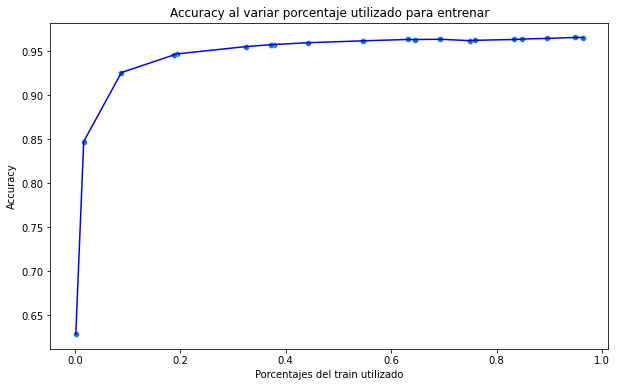

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6

acc_data = {
    'Porcentajes del train utilizado' : train_percentages_list,
    'Accuracy' : acc_list
}

dfj = pd.DataFrame(acc_data)

a = sns.lineplot(data = dfj, x = 'Porcentajes del train utilizado', y = 'Accuracy', color = 'blue')
a = sns.scatterplot(data = dfj, x = 'Porcentajes del train utilizado', y = 'Accuracy')
a.set_title('Accuracy al variar porcentaje utilizado para entrenar')
a.plot()